In [1]:
import matplotlib.pyplot as py
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
loc = input("Enter position of file in ur pc with double backslash, for default location type \"1\": ")
if (loc == "1"):
    loc = "weatherAUS.csv"
data = pd.read_csv(loc)

Enter position of file in ur pc with double backslash, for default location type "1":  1


In [3]:
a = data[["WindGustDir","WindDir9am","WindDir3pm"]].values.reshape(-1) 
directions = np.delete(pd.unique(a),-1) #reason for deleting last element is that, "nan" was also considered as unique
print(directions)

['W' 'WNW' 'NNW' 'WSW' 'NE' 'SE' 'E' 'ENE' 'NW' 'SW' 'SSE' 'S' 'N' 'ESE'
 'NNE' 'SSW']


In [4]:
data= data.drop(['Date'],axis=1)
locations = data.Location.unique()
data = data.replace(dict(zip(locations, range(len(locations)))))
data = data.replace(dict(zip(directions, range(len(directions)))))
data = data.replace({"No":0, "Yes":1})
print(data)

        Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0              0     13.4     22.9       0.6          NaN       NaN   
1              0      7.4     25.1       0.0          NaN       NaN   
2              0     12.9     25.7       0.0          NaN       NaN   
3              0      9.2     28.0       0.0          NaN       NaN   
4              0     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...       ...          ...       ...   
145455        48      2.8     23.4       0.0          NaN       NaN   
145456        48      3.6     25.3       0.0          NaN       NaN   
145457        48      5.4     26.9       0.0          NaN       NaN   
145458        48      7.8     27.0       0.0          NaN       NaN   
145459        48     14.9      NaN       0.0          NaN       NaN   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0               0.0           44.0         0.0         1.0  ...    

In [5]:
mean=data.mean()
if mean['RainTomorrow']<=0.5:
    data['RainTomorrow']=data['RainTomorrow'].fillna(0)
else:
    data['RainTomorrow']=data['RainTomorrow'].fillna(1)
if mean['RainTomorrow']<=0.5:
    data['RainTomorrow']=data['RainTomorrow'].fillna(0)
else:
    data['RainTomorrow']=data['RainTomorrow'].fillna(1)
data = data.fillna(mean)
print(data)

        Location  MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0              0     13.4  22.900000       0.6     5.468232  7.611178   
1              0      7.4  25.100000       0.0     5.468232  7.611178   
2              0     12.9  25.700000       0.0     5.468232  7.611178   
3              0      9.2  28.000000       0.0     5.468232  7.611178   
4              0     17.5  32.300000       1.0     5.468232  7.611178   
...          ...      ...        ...       ...          ...       ...   
145455        48      2.8  23.400000       0.0     5.468232  7.611178   
145456        48      3.6  25.300000       0.0     5.468232  7.611178   
145457        48      5.4  26.900000       0.0     5.468232  7.611178   
145458        48      7.8  27.000000       0.0     5.468232  7.611178   
145459        48     14.9  23.221348       0.0     5.468232  7.611178   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0          0.000000       44.00000         

In [6]:
data1=data
max= data.max()
min = data.min()
data = (data-mean)/(max-min)
print(data)

        Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0      -0.490836  0.028443 -0.006075 -0.004746          0.0       0.0   
1      -0.490836 -0.113067  0.035513 -0.006364          0.0       0.0   
2      -0.490836  0.016650  0.046855 -0.006364          0.0       0.0   
3      -0.490836 -0.070614  0.090334 -0.006364          0.0       0.0   
4      -0.490836  0.125141  0.171619 -0.003668          0.0       0.0   
...          ...       ...       ...       ...          ...       ...   
145455  0.509164 -0.221557  0.003377 -0.006364          0.0       0.0   
145456  0.509164 -0.202689  0.039294 -0.006364          0.0       0.0   
145457  0.509164 -0.160237  0.069540 -0.006364          0.0       0.0   
145458  0.509164 -0.103633  0.071430 -0.006364          0.0       0.0   
145459  0.509164  0.063820  0.000000 -0.006364          0.0       0.0   

        WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
0         -0.495866       0.030735   -0.509

In [7]:
X=data.values
#here k is the number of clusters
def distance(point,centroid):
    return np.sqrt(np.sum((centroid-point)**2,axis=1))
def clusters(k,iterations):
    centroids = np.random.uniform(np.amin(X,axis=0), np.amax(X,axis=0),size=(k,X.shape[1])) #this will randomly generate centers within the range of max and min of each dimensions(features) so we can find the cluster center faster
    for i in range(iterations):
        y=np.zeros(X.shape[0])
        for j in range(X.shape[0]):
            distancy = distance(X[j],centroids)
            y[j]=(np.argmin(distancy))
        #y = np.array(y)
        cluster = []   #its a list of list of indexes of points where cluster is same
        for j in range(k):
            cluster.append(np.argwhere(y==j))
        newcentroids=[]
        for j,indexes in enumerate(cluster):
            if (len(indexes)==0):
                newcentroids.append(centroids[j])
            else:
                newcentroids.append(np.mean(X[indexes],axis=0)[0])
        if np.max(abs(centroids-newcentroids))<0.000001:
            break
        centroids = np.array(newcentroids)
        if(i%5==0):
            print("No. of iterations done: ", i)
    return y,centroids

No. of iterations done:  0
No. of iterations done:  5
Silhouette score for  2  clusters done
No. of iterations done:  0
Silhouette score for  3  clusters done
No. of iterations done:  0
No. of iterations done:  5
No. of iterations done:  10
No. of iterations done:  15
No. of iterations done:  20
No. of iterations done:  25
No. of iterations done:  30
No. of iterations done:  35
No. of iterations done:  40
No. of iterations done:  45
No. of iterations done:  50
No. of iterations done:  55
No. of iterations done:  60
Silhouette score for  4  clusters done
No. of iterations done:  0
No. of iterations done:  5
No. of iterations done:  10
No. of iterations done:  15
No. of iterations done:  20
No. of iterations done:  25
No. of iterations done:  30
No. of iterations done:  35
No. of iterations done:  40
No. of iterations done:  45
No. of iterations done:  50
No. of iterations done:  55
No. of iterations done:  60
No. of iterations done:  65
No. of iterations done:  70
No. of iterations done

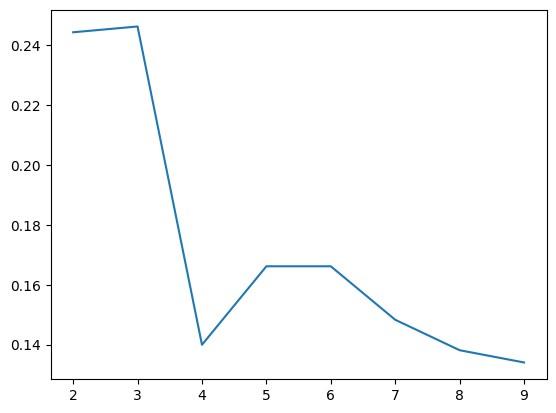

In [9]:
#silhouette score
silhouette_avg = []
for i in range(2,10):
    labels,centroids = clusters(i,1000)
    silhouette_avg.append(silhouette_score(X, labels))
    print("Silhouette score for ",i," clusters done")
py.plot(range(2,10),silhouette_avg)

In [10]:
y,centroids = clusters(3,1000)

No. of iterations done:  0
No. of iterations done:  5
No. of iterations done:  10
No. of iterations done:  15
No. of iterations done:  20
No. of iterations done:  25


In [11]:
print(centroids)

[[-0.01328606  0.01763252 -0.01687034 -0.0057547  -0.0015043  -0.09074796
  -0.00936614  0.0331067   0.00912033 -0.00598259  0.00431958  0.01049212
   0.02753499  0.11348184 -0.03621577 -0.03900766  0.07916356  0.11292643
   0.00521171 -0.02660248 -0.21542235  0.77581878]
 [ 0.00371286 -0.00827913  0.02190718 -0.00602486  0.00217051  0.04396671
   0.00715672 -0.01519639  0.00709287  0.00543355 -0.00497545 -0.00670976
  -0.04583525 -0.06743538  0.01886576  0.01362785 -0.05246921 -0.05111448
   0.00722743  0.02364897 -0.21815416 -0.22418122]
 [-0.00401447  0.01545289 -0.05703577  0.02132026 -0.00574158 -0.08363001
  -0.01654307  0.02796156 -0.02637106 -0.01317154  0.01268911  0.01458244
   0.12354042  0.14220453 -0.03736125 -0.02002438  0.11559518  0.09320088
  -0.02465883 -0.05702216  0.77580714  0.23372078]]


D:\python\lib\site-packages\seaborn\axisgrid.py:453: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


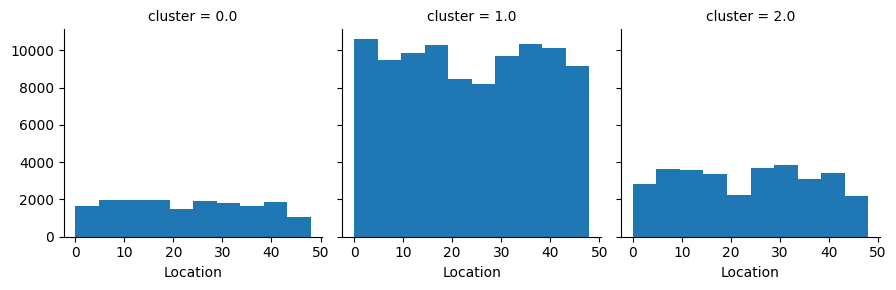

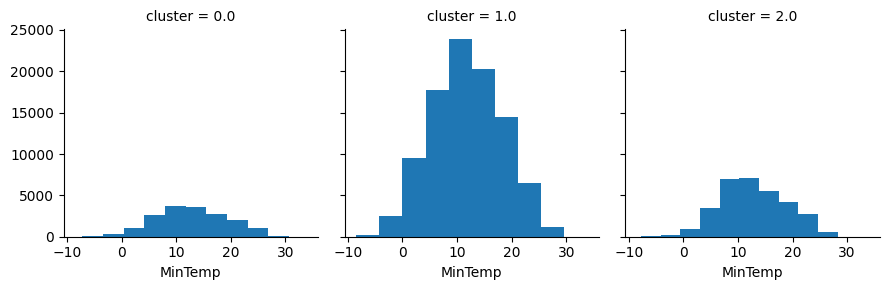

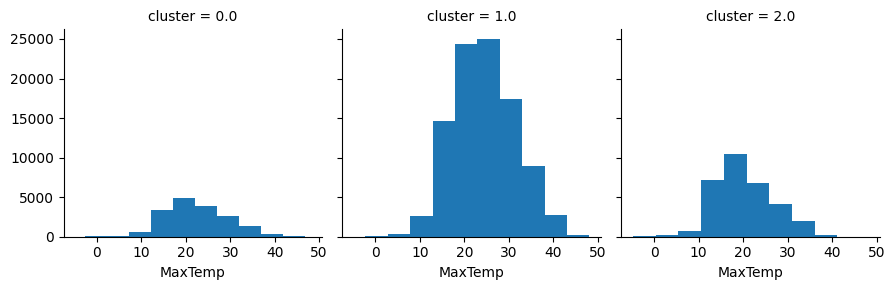

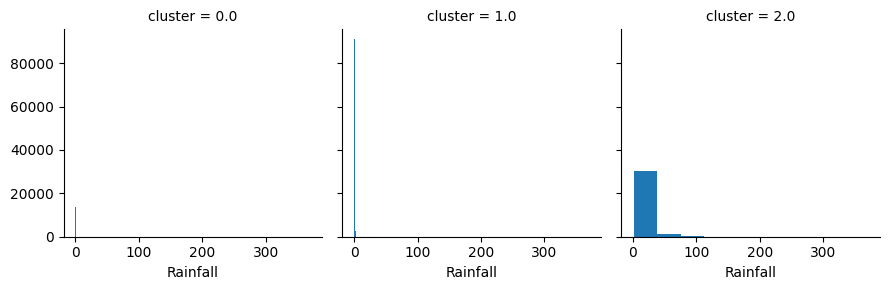

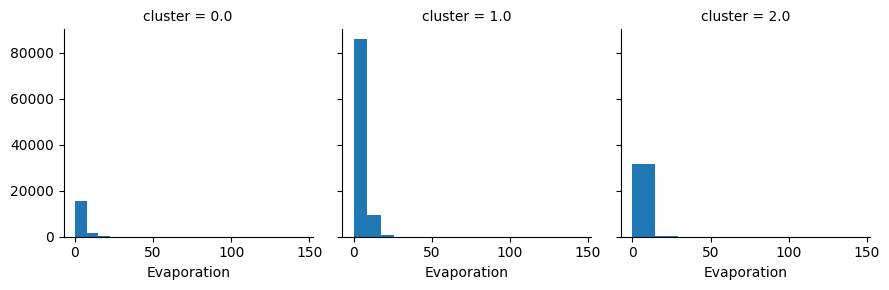

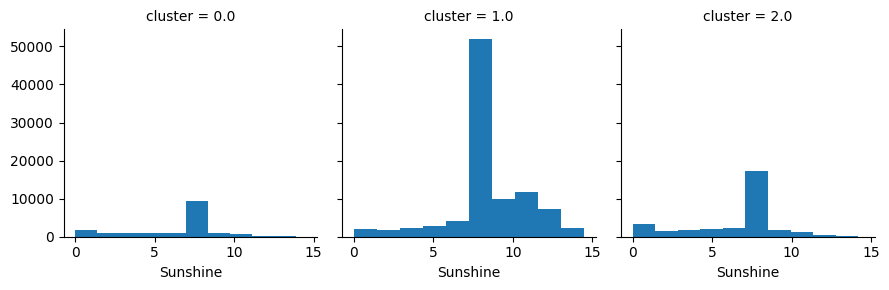

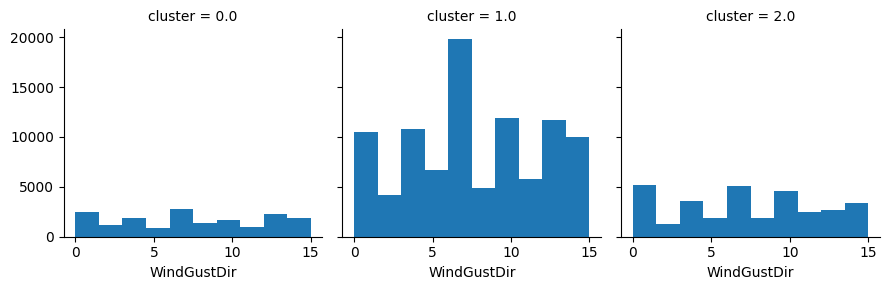

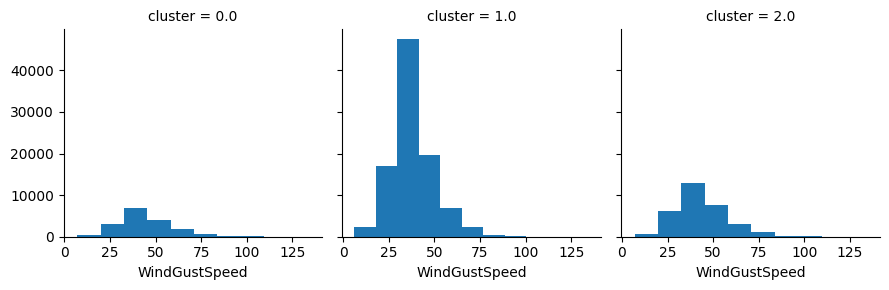

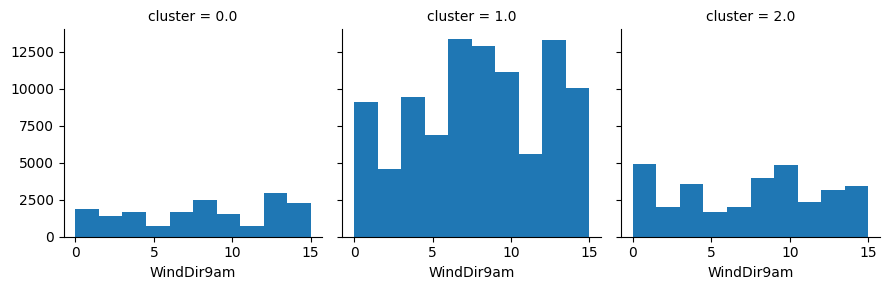

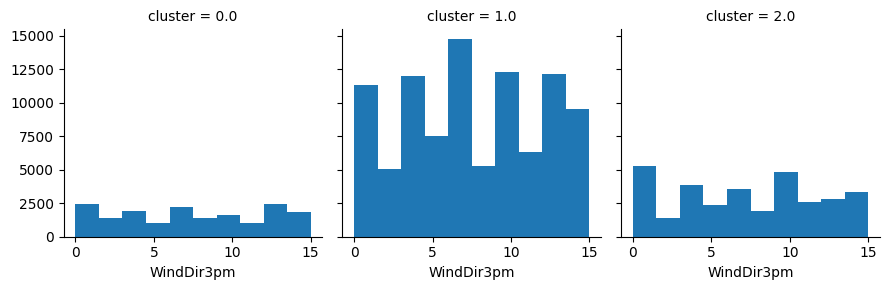

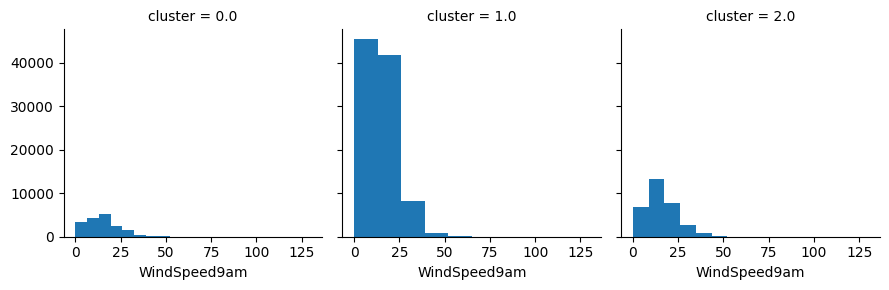

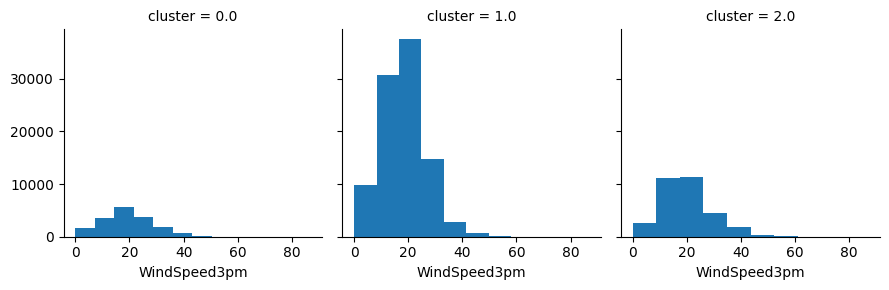

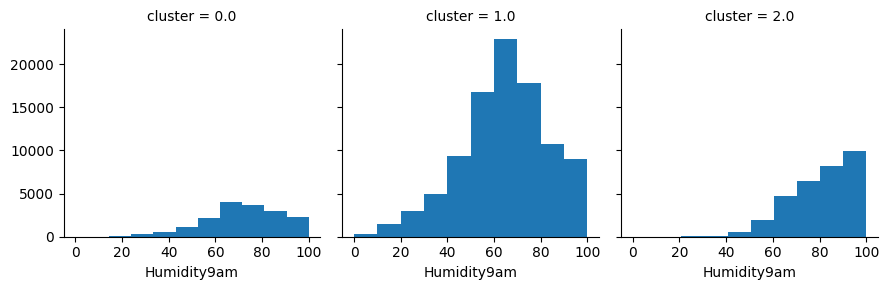

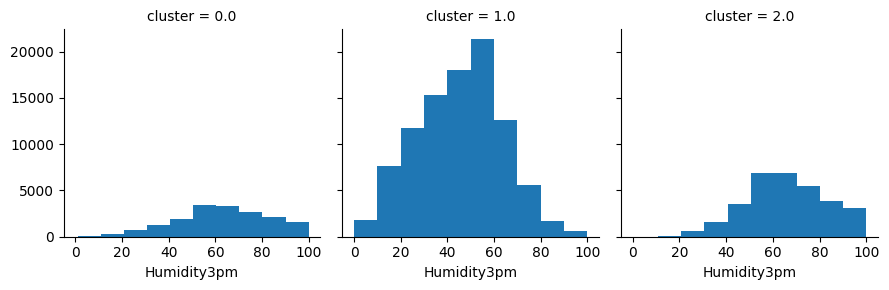

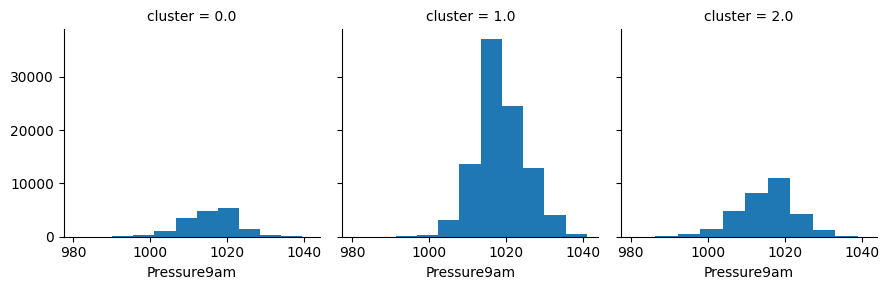

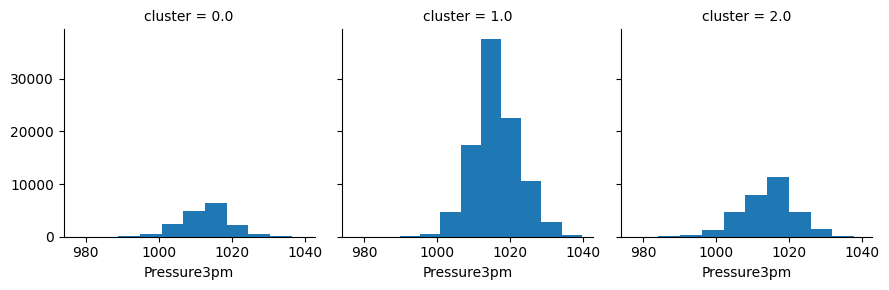

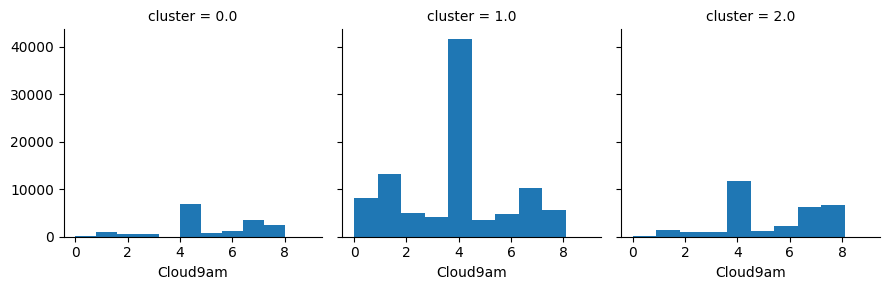

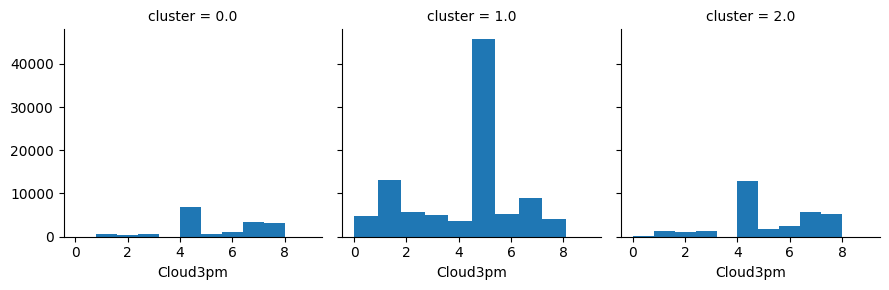

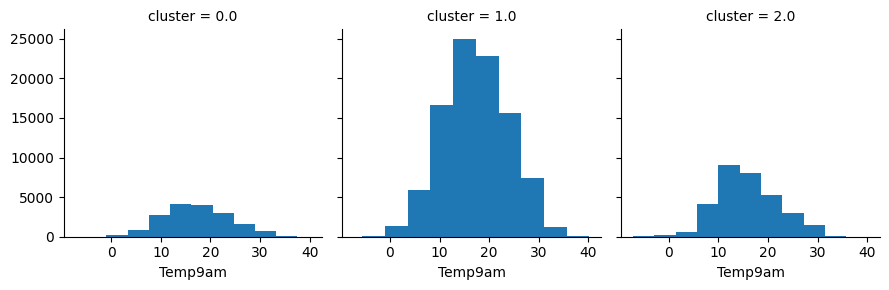

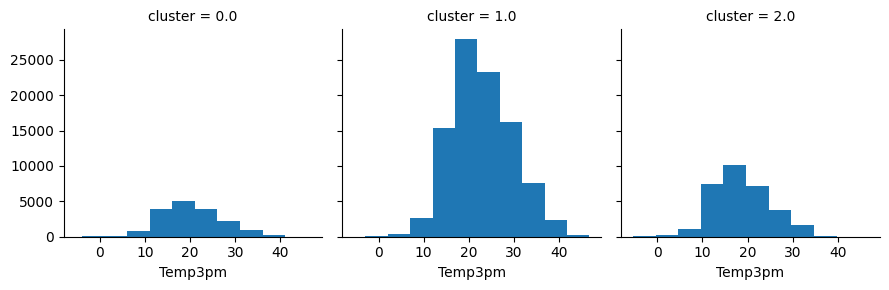

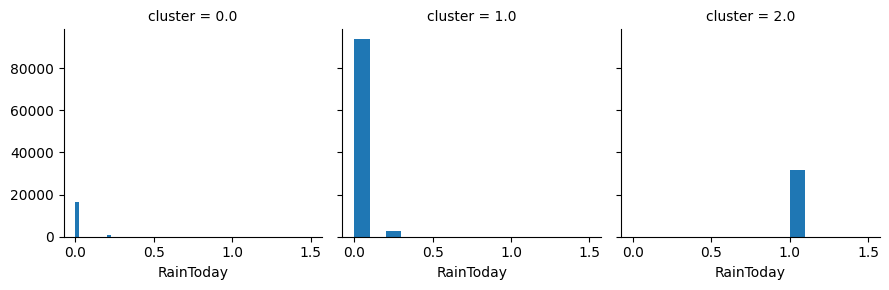

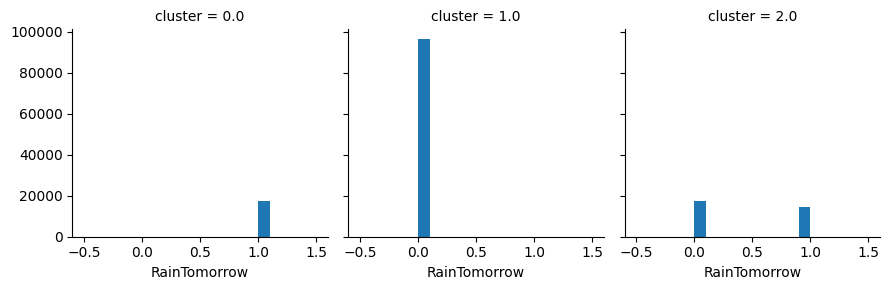

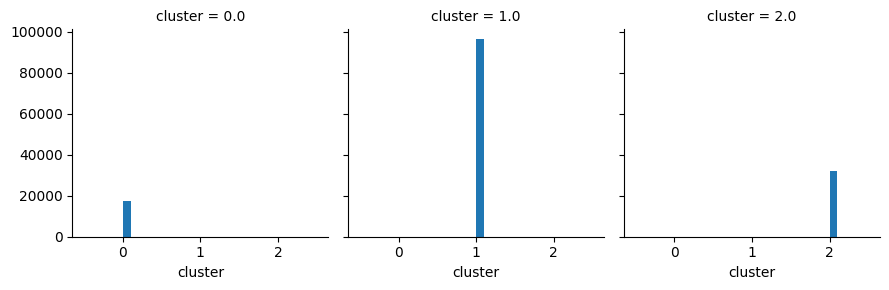

In [12]:
clusters=pd.concat([data1, pd.DataFrame({'cluster':y})], axis=1)
clusters.head()
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(py.hist, c)

### Cluster 1 -> It didnt rain today, but it rained tomorrow
### Cluster 2 -> It didnt rain today, and it didnt rained tomorrow
### cluster 3 -> It rained today and depending on other factors, it might or might not rain tomorrow

In [13]:
pca = PCA(3)
pca.fit(X)
x = pca.transform(X)
print(x.shape)

(145460, 3)


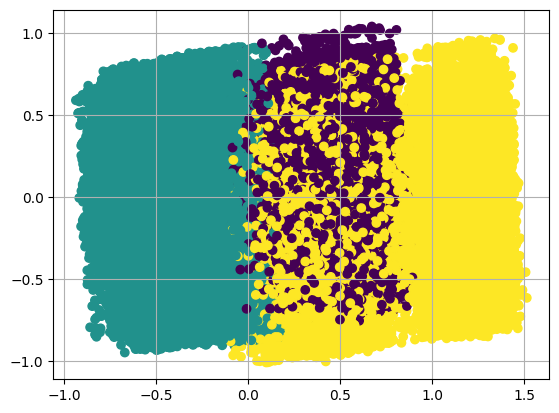

In [14]:
py.scatter(x.T[0],x.T[1],c=y)
py.grid()
py.show()

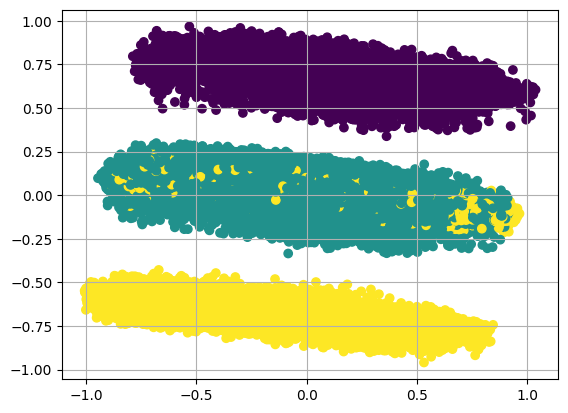

In [15]:
py.scatter(x.T[1],x.T[2],c=y)
py.grid()
py.show()

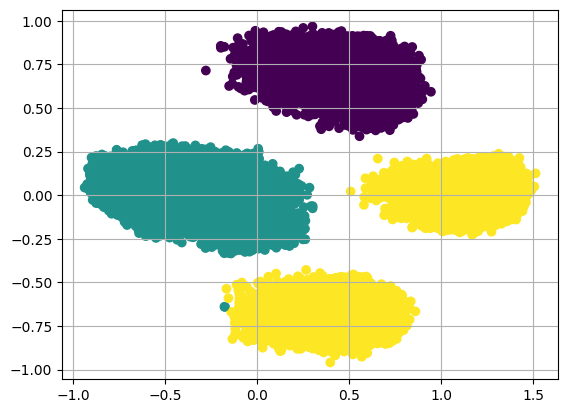

In [16]:
py.scatter(x.T[0],x.T[2],c=y)
py.grid()
py.show()